`This nootbook has been created by IA-team
`

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from data_preparation.embedding.general_embedding import wordopt, manual_testing, english_only, remove_emoji, remp_abreviation,remp_emoticon,remove_single_lettre
import pickle
import emoji
from nltk.corpus import words, stopwords
from nltk.stem import WordNetLemmatizer
from data_preparation.embedding import general_embedding
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [2]:
import nltk
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soufianebelhabibe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soufianebelhabibe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:

english_words = set(words.words())
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

In [4]:
target = "class"
model_name = "data-cleaning"
project_name = "fake-news detection"

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
df_fake = pd.read_csv("/Users/soufianebelhabibe/Desktop/IA-project/data/Fake.csv")
df_true = pd.read_csv("/Users/soufianebelhabibe/Desktop/IA-project/data/True.csv")

In [7]:
#df_fake.head(5)

In [8]:
#df_true.head(5)

In [9]:
df_fake.shape, df_true.shape

((23481, 4), (21417, 4))

In [10]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead,,News,"May 10, 2017"
freq,6,626,9050,46


## data-preparation

In [11]:
# Insert the target class, for fake news class = 0 and for true mews class = 1 
df_fake["class"] = 0
df_true["class"] = 1

In [12]:
df_all = pd.concat([df_fake, df_true], axis= 0)
df_all.shape

(44898, 5)

<Axes: xlabel='count', ylabel='class'>

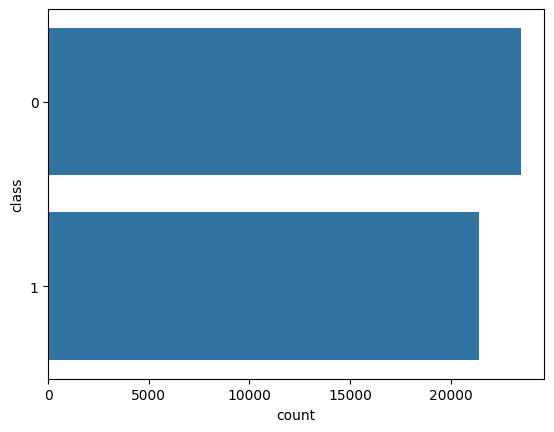

In [13]:
sns.countplot(y='class', data=df_all)

<Axes: ylabel='count'>

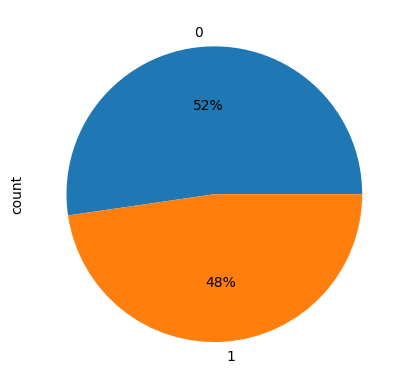

In [14]:
target = "class"
df_all["class"].value_counts().plot(kind="pie", autopct='%1.0f%%')

In [15]:
df_all.columns, df_all.head(5)

(Index(['title', 'text', 'subject', 'date', 'class'], dtype='object'),
                                                                                         title  \
 0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
 1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
 2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
 3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
 4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   
 
                                                                                                                                                                                                                                                                                                                                                   

In [16]:
data = df_all.copy()

In [17]:
data.drop(["title","subject","date"], axis=1, inplace=True)

## Process the text 

### Try our text_cleaning function from data_preparation.embedding

In [23]:
## trying our function wordopt
text = '@SouthwestAir @Imaginedragons @beatsmusic well timed tweet et bien pour que ça, paris a été une joyeuse ville, just boarded and will be listening on my way home!, :)'
print("features without clean")
print(text)
print()
print("features with clean")
text = wordopt(text)
print(text)

features without clean
@SouthwestAir @Imaginedragons @beatsmusic well timed tweet et bien pour que ça, paris a été une joyeuse ville, just boarded and will be listening on my way home!, :)

features with clean
southwestair imaginedragons beatsmusic well timed tweet et bien pour que ça paris a été une joyeuse ville just boarded and will be listening on my way home


In [37]:
print('text de depart')
text = "hello Dr banks bought a chair for"
print(text)
print ('text nettoyé')
print(remove_stopwords(text))

text de depart
hello Dr banks bought a chair for
text nettoyé


NameError: name 'stop_words' is not defined

In [5]:
text = '@SouthwestAir @Imaginedragons @beatsmusic a b well timed  y tweet et bien  h pour que ça, paris a été une joyeuse ville, just boarded and will be listening on my way home!, :)'
a = remove_single_lettre(text)
b = english_only(a)
print(b)

well timed tweet bien pour just and will be listening on my way


In [23]:
# Example usage:
text_with_emojis = "I love 🐍 and 🐼!"
text_without_emojis = remove_emoji(text_with_emojis)
print("Text with emojis:", text_with_emojis)
print("Text without emojis:", text_without_emojis)

Text with emojis: I love 🐍 and 🐼!
Text without emojis: I love snake and panda!


In [24]:
test = '@ladymaryann not yet  ive been waiting for hours and hours by my computer ;) :) :D'
remp_emoticon(test)

'@ladymaryann not yet  ive been waiting for hours and hours by my computer  emoticon_clindoeil   emoticon_joyeux   emoticon_rire '

In [25]:
test = "me time @ladymaryann not yet  ive been can't waiting for hours and hours by my computer ;)"
remp_abreviation(test)

'me ti ame @ladymaryann not yet  i have been can not waiting for hours and hours by am y computer ;)'

### Applying cleaning functions for data

In [18]:
# keep engish words only 
data["text"] =data["text"].apply(english_only)

In [19]:
# replace emoticons
data["text"] =data["text"].apply(remp_emoticon)

In [20]:
#replace abreviations 
data["text"] =data["text"].apply(remp_abreviation)

In [21]:
#replace emoji with theire signification
data["text"] =data["text"].apply(remove_emoji) 

In [22]:
#data general cleaning
data["text"] =data["text"].apply(wordopt) 

In [23]:
#data remove single lettre 
data["text"] =data["text"].apply(remove_single_lettre) 

In [24]:
data.head()

,text,class
0,trump wish happy new year leave gi shout dishonest fake news former reality show star one job country rapidly want wish even dishonest fake news happy healthy new president angry pant great year country rapidly want wish even dishonest fake news happy healthy new great year trump tweet went kind president new year greeting like infantile lack decency even allow hi rise gutter long enough wish happy new bishop swan one ampeachment would ake great year also accept control hear include people hate hate alan word new say happy new trump new year eve tweet new year fought lost badly know trump nothing new directed new year anni haversary dale holiday clearly long work hallmark becoming steven always like difference last filter breaking apart term year old people hole thinking would change got en change year,0
1,house intelligence committee chairman going bad like russia investigation department justice order protect dossier according new york trump campaign adviser drunk wine bar revealed knowledge opposition research top boy administration uch none damning drunken fool wine coffee help arrange new york eeting trump president two known former aide set world team trump ran hi erely coffee ay revealed diplomat downer shopping around possible dirt presidential nominee exactly uch said night kensington wine report two democratic information according four current former foreign direct knowledge guilty lying witness special counsel badly reality win,0
2,revealed former sheriff considered homeland security secretary trump scandal brief plane fellow passenger dan later police reason except aybe police stop black search warrant executed see calling fake news even though search warrant uninti amidated edia smear discredit fake news designed silence former sheriff continue poke eye sharp stick bitch slap scum til get better people uninti amidated edia smear discredit fake news designed silence continue poke eye sharp stick bitch slap scum til get better people stop lying edia fake news smear antidote go right punch nose ake taste nothing bully like lying edia attention better gi taste blood hi local newspaper search warrant chose file ti ame ean especially continue decision charge search warrant hope rest village people kirk baked ammigration pendulum swinger police stand someone ade fun hat asterful seem never tire think steely resolve one visible eye people think tough guy fake break trying earn still relevant sure drink lot water prison black thirst county jail cell victi thought point repeated spencer,0
3,trump would back work following fourth day former reality show star blasted former president golf trump track outpace number golf predecessor tracker trump trump golf today pas total next bump post reporter discovered trump really everything administration bizarre reference unlike working fix problem golf done spent several day row golf serve following essage event internal server snippet code footer also noted weird code clear would ever actually reference golf error essage removed trump also fixed still clear would actually since actual presumably page different essage someone either trump sensiti enough trump golf problem ake issue go away quickly people idea uch love see exchange led code best part operator bit code never get look always nobody trump name even golf joe,0
4,pope used annual day essage rebuke trump without even pope essage day united condemned trump ove recognize capital pontiff peaceful coexistence two within utually agreed internationally see iddle east continue suffer growing festi let ask lord peace holy let pray resume dialogue ay prevail solution finally pope went plead acceptance forced issue trump fight used place inn war blowing world outdated odel development produce societal environmental focus sign child recognize hi little especially like place well pain hard place lay one ay heart closed pope said ary find safe place stay leave comfortable easy journey young couple full hope emoticonlangue 

## cleaning data step


In [25]:
data.isnull().sum() , data.duplicated().sum()

(text     0
 class    0
 dtype: int64,
 6389)

In [26]:
data.dropna(axis=0 , inplace=True)
data.drop_duplicates(inplace =True)

In [27]:
data.isnull().sum() , data.duplicated().sum()

(text     0
 class    0
 dtype: int64,
 0)

In [28]:
export_folder = '/Users/soufianebelhabibe/Desktop/IA-project/data/data.csv'
data.to_csv(export_folder, index=False)

### `tf-idf vectorizer`

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X = vect.fit_transform(data["text"])

In [31]:
vect.get_feature_names_out()

array(['aa', 'aardvark', 'aba', ..., 'zorro', 'zucchini', 'zygote'],
      dtype=object)

In [32]:
print(X)

  (0, 7710)	0.051722013030729534
  (0, 9933)	0.04493734122973283
  (0, 4057)	0.09447019600193686
  (0, 21517)	0.0668239070811313
  (0, 10816)	0.08792615180143337
  (0, 14301)	0.057054361711719286
  (0, 21383)	0.058345554694132475
  (0, 1463)	0.07462235795410638
  (0, 3250)	0.06915002199142774
  (0, 8786)	0.11267677497212748
  (0, 12891)	0.028986060961757418
  (0, 6500)	0.07219496758492525
  (0, 764)	0.05243124890829761
  (0, 20378)	0.07347025229058274
  (0, 2524)	0.06058032800695816
  (0, 10302)	0.10463993524683951
  (0, 24342)	0.0393001657717402
  (0, 4408)	0.05540644439454998
  (0, 10818)	0.07877230419891625
  (0, 5824)	0.10788737585875928
  (0, 10483)	0.08200697966428595
  (0, 1342)	0.08200697966428595
  (0, 6565)	0.07034270228177661
  (0, 14025)	0.0474129888522924
  (0, 12726)	0.0386432219155986
  :	:
  (38508, 14973)	0.26313238655640253
  (38508, 5738)	0.08867643805065338
  (38508, 19820)	0.08933724041076894
  (38508, 1024)	0.06868388874915142
  (38508, 5914)	0.07252826437589788
 

### `Word2vec`

In [44]:
def preprocess_text(text):
    tokens = text.split()  # Tokenization
    tokens = [token for token in tokens if token not in stop_words]  # Suppression des mots vides
    return tokens

In [45]:
df1 = data["text"]
tokenized_tweets = df1.apply(preprocess_text)
tokenized_tweets


0                                                                                                                                                            [trump, wish, happy, new, year, leave, give, shout, dishonest, fake, news, former, reality, show, star, one, job, country, rapidly, want, wish, even, dishonest, fake, news, happy, healthy, new, president, angry, pant, great, year, country, rapidly, want, wish, even, dishonest, fake, news, happy, healthy, new, great, year, trump, tweet, went, kind, president, new, year, greeting, like, infantile, lack, decency, even, allow, rise, gutter, long, enough, wish, happy, new, bishop, swan, one, impeachment, would, make, great, year, also, accept, control, hear, include, many, people, hate, hate, alan, word, new, say, happy, new, trump, new, year, eve, tweet, new, year, many, fought, lost, ...]
1                                                                                                          [house, intelligence, committee, chairman

In [ ]:
from gensim.models import Word2Vec

In [ ]:

size=10
model_w2v = Word2Vec(
            tokenized_tweets, #l'ensemble des tweet
            window=5, # context window size
            vector_size=size,  #La taille de sortie
            min_count=2, # Ignores all words with total frequency lower than 2.
            sg = 0) #on utilise la methode CBOW

model_w2v.train(tokenized_tweets, total_examples= len(data), epochs=20)

#etape5 je stocke mes resultats en dataframe
words=list(model_w2v.wv.key_to_index)
data_emb1=pd.DataFrame(model_w2v.wv[list(model_w2v.wv.key_to_index)],index=words)

data_emb1.head() , data_emb1.shape

### `Bert Google`

## Splitting and training Tf-idf result

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, data["class"], test_size=0.2, shuffle=True)

In [34]:
print(f"X_train shape :{X_train.shape}")
print(f"X_test  shape :{X_test.shape}")
print(f"y_train shape :{y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape :(30807, 24586)
X_test  shape :(7702, 24586)
y_train shape :(30807,)
y_test shape : (7702,)


### KNN

In [35]:
knn = KNeighborsClassifier()
model_ = knn.fit(X_train, y_train)

In [36]:
y_pred = model_.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.8553622435730979
Precision: 0.8553622435730979
Recall: 0.8553622435730979
F1 Score: 0.8553622435730979
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      3469
           1       0.83      0.93      0.88      4233

    accuracy                           0.86      7702
   macro avg       0.86      0.85      0.85      7702
weighted avg       0.86      0.86      0.85      7702



### RandomForest

In [39]:


clf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_clf =clf.fit(X_train, y_train)

In [43]:
y_pred = model_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.8254998701635938
Precision: 0.8254998701635938
Recall: 0.8254998701635938
F1 Score: 0.8254998701635938
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      3469
           1       0.76      0.99      0.86      4233

    accuracy                           0.83      7702
   macro avg       0.88      0.81      0.81      7702
weighted avg       0.86      0.83      0.82      7702



[[2147 1322]
 [  22 4211]]


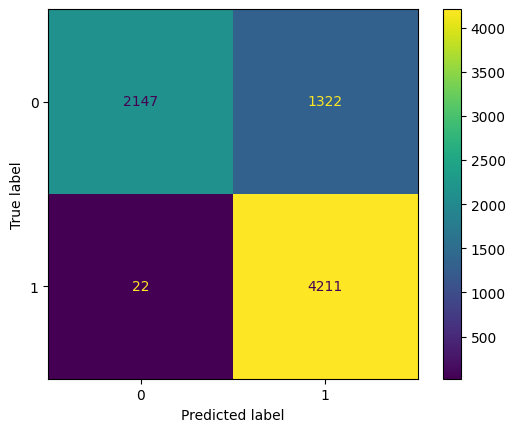

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model_clf.classes_) 
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=model_clf.classes_)
disp.plot()
plt.show()

- Vrai positif (True Positive, TP) : Il s'agit du nombre de prédictions positives correctes. Dans votre cas, il y a 4280 vrais positifs. Cela signifie que 4280 échantillons ont été correctement classés comme positifs (fake_news).
- Faux positif (False Positive, FP) : Il s'agit du nombre de prédictions positives incorrectes. Dans votre cas, il y a 1376 faux positifs. Cela signifie que 1376 échantillons ont été incorrectement classés comme positifs (fake_news), alors qu'ils étaient en fait négatifs (Not_fake_news).
- Vrai négatif (True Negative, TN) : Il s'agit du nombre de prédictions négatives correctes. Dans votre cas, il y a 2022 vrais négatifs. Cela signifie que 2022 échantillons ont été correctement classés comme négatifs (Not_fake_news).
- Faux négatif (False Negative, FN) : Il s'agit du nombre de prédictions négatives incorrectes. Dans votre cas, il y a 24 faux négatifs. Cela signifie que 24 échantillons ont été incorrectement classés comme négatifs (Not_fake_news), alors qu'ils étaient en fait positifs (fake_news).

### GradientBoostingClassifier

In [45]:
gbc = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100)
model_gbc = gbc.fit(X_train, y_train)

Accuracy: 0.9285899766294469
Precision: 0.9285899766294469
Recall: 0.9285899766294469
F1 Score: 0.9285899766294469
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3469
           1       0.92      0.95      0.94      4233

    accuracy                           0.93      7702
   macro avg       0.93      0.93      0.93      7702
weighted avg       0.93      0.93      0.93      7702



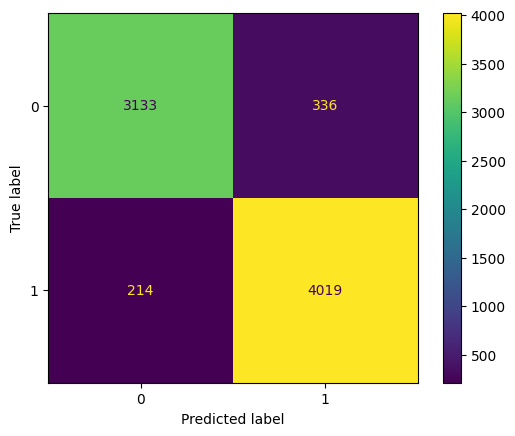

In [46]:
y_pred = model_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model_gbc.classes_) 
disp = ConfusionMatrixDisplay(cm, display_labels=model_gbc.classes_)
disp.plot()
plt.show()

### `VotingClassifier`
* [VotionClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)

In [47]:
eclf1 = VotingClassifier(estimators=[
       ('Knn', knn), ('rf', clf), ('gbc', gbc)], voting='hard') 
eclf1 = eclf1.fit(X_train, y_train)

Accuracy: 0.90950402492859
Precision: 0.90950402492859
Recall: 0.90950402492859
F1 Score: 0.90950402492859
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3469
           1       0.87      0.99      0.92      4233

    accuracy                           0.91      7702
   macro avg       0.92      0.90      0.91      7702
weighted avg       0.92      0.91      0.91      7702



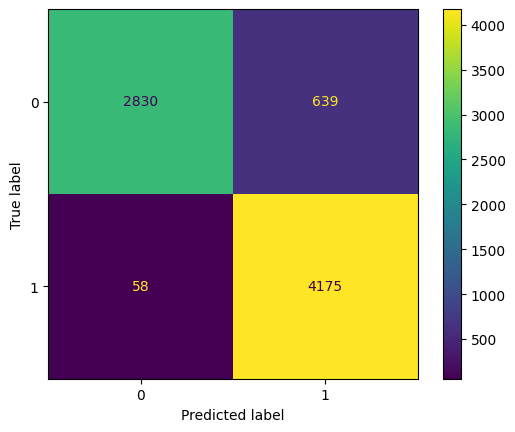

In [48]:
y_pred = eclf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=eclf1.classes_) 
disp = ConfusionMatrixDisplay(cm, display_labels=eclf1.classes_)
disp.plot()
plt.show()

We have a very good result with GrdintBoosting algorithme so we are going to use this one in production for Tf-idf encoding  

## Splitting and training Word2vec result

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_emb1, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Créer le modèle CNN
model = Sequential()

# Ajouter une couche d'embedding
model.add(Embedding(input_dim=len(words), output_dim=size))
# Ajouter une couche de convolution avec activation ReLU
model.add(Conv1D(128, 5, activation='relu'))

# Ajouter une couche de pooling globale
model.add(GlobalMaxPooling1D())

# Ajouter une couche entièrement connectée avec activation ReLU
model.add(Dense(128, activation='relu'))

# Ajouter une couche de sortie avec activation sigmoïde pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle avec la fonction de perte et l'optimiseur appropriés
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


## Model testig 

In [82]:
'''def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vect.transform(new_x_test)
    #pred_LR = model.predict(new_xv_test)
    pred_KNN = model_.predict(new_xv_test)
    print(new_def_test.shape)

    return print("KNN Prediction: {}".format(output_lable(pred_KNN[0])))          '''                                                                                      

In [ ]:
'''BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as  obsolete  - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement:  NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners.  NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment  very welcome .  In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West,  Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over  the scale of its defense spending, also welcomed the new U.S. plan.  Our continued commitment is necessary on the path to stabilizing the country,  a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were  weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill.
'''

In [ ]:

news = str(input())
general_embedding.manual_testing(news)

## Data exportation 

In [49]:
export_folder = "/Users/soufianebelhabibe/Desktop/IA-project/data/model/model_gbc.pickle"

In [50]:
import pickle
with open(export_folder, 'wb') as f : 
    pickle.dump(model_gbc, f)

In [84]:
export_folder = "/Users/soufianebelhabibe/Desktop/IA-project/data/model/tfidf_vectorizer.pickle"
# Sauvegarder le vecteur TF-IDF dans un fichier pickle
with open(export_folder, 'wb') as f:
    pickle.dump(vect, f)
